In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb 
import catboost as catb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import infobase

np.__version__

'1.26.4'

In [3]:
import os

root = '../parsing_results/csv'
files = os.listdir('../parsing_results/csv')

df_0 = pd.read_csv(f'{root}/{files[0]}')
df_1 = pd.read_csv(f'{root}/{files[1]}')

df_0.head()



,numrooms,squaremeters,numberoffloors,floor,price,district,street,builtyear,ceilinghight,isnewbuilding,seller,bathroomtype,residentialcomplex,repaired,city
0,4,160.85,NaN,NaN,129645100,бостандыкский,NaN,2025,3.0,True,новостройка,2 с/у и более,verdi,NaN,Алматы
1,2,72.00,NaN,NaN,79200000,NaN,NaN,2024,3.0,True,новостройка,2 с/у и более,boulevard residence,NaN,Алматы
2,1,38.30,NaN,NaN,25929100,жетысуский,NaN,2025,3.0,True,новостройка,совмещенный,rams saiahat,NaN,Алматы
3,6,340.60,NaN,NaN,161785000,бостандыкский,NaN,2013,3.0,True,новостройка,2 с/у и более,тан нуры,NaN,Алматы
4,3,87.00,16.0,5.0,90000000,бостандыкский,NaN,2019,3.0,False,крыша агент,2 с/у и более,дом на абая,NaN,Алматы


In [4]:
df = pd.concat([df_0, df_1])
df.shape

(36325, 15)

In [5]:

df.head()

,numrooms,squaremeters,numberoffloors,floor,price,district,street,builtyear,ceilinghight,isnewbuilding,seller,bathroomtype,residentialcomplex,repaired,city
0,4,160.85,NaN,NaN,129645100,бостандыкский,NaN,2025,3.0,True,новостройка,2 с/у и более,verdi,NaN,Алматы
1,2,72.00,NaN,NaN,79200000,NaN,NaN,2024,3.0,True,новостройка,2 с/у и более,boulevard residence,NaN,Алматы
2,1,38.30,NaN,NaN,25929100,жетысуский,NaN,2025,3.0,True,новостройка,совмещенный,rams saiahat,NaN,Алматы
3,6,340.60,NaN,NaN,161785000,бостандыкский,NaN,2013,3.0,True,новостройка,2 с/у и более,тан нуры,NaN,Алматы
4,3,87.00,16.0,5.0,90000000,бостандыкский,NaN,2019,3.0,False,крыша агент,2 с/у и более,дом на абая,NaN,Алматы


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36325 entries, 0 to 18322
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   numrooms            36325 non-null  int64  
 1   squaremeters        36325 non-null  float64
 2   numberoffloors      33866 non-null  float64
 3   floor               34305 non-null  float64
 4   price               36325 non-null  int64  
 5   district            35057 non-null  object 
 6   street              0 non-null      float64
 7   builtyear           36325 non-null  int64  
 8   ceilinghight        30388 non-null  float64
 9   isnewbuilding       36325 non-null  bool   
 10  seller              36325 non-null  object 
 11  bathroomtype        26891 non-null  object 
 12  residentialcomplex  22454 non-null  object 
 13  repaired            10242 non-null  object 
 14  city                36325 non-null  object 
dtypes: bool(1), float64(5), int64(3), object(6)
memory usage: 

In [7]:
df.isnull().sum()

numrooms                  0
squaremeters              0
numberoffloors         2459
floor                  2020
price                     0
district               1268
street                36325
builtyear                 0
ceilinghight           5937
isnewbuilding             0
seller                    0
bathroomtype           9434
residentialcomplex    13871
repaired              26083
city                      0
dtype: int64

In [8]:
df['isrescomplex'] = df['residentialcomplex'].replace(r'^\s*$', np.nan, regex=True)
df['isrescomplex'] = df['isrescomplex'].notna()
df['isrescomplex'].value_counts()

isrescomplex
True     22454
False    13871
Name: count, dtype: int64

In [9]:
df = df.drop(columns=['street', 'residentialcomplex'])

In [10]:
# replace not city value to np.nan

df['city'] = df['city'].apply(lambda x: x if x in infobase.cities else np.nan)
df['city'].value_counts()

city
Астана    18298
Алматы    17948
Name: count, dtype: int64

In [11]:
df['repaired'] = df['repaired'].replace(r'^\s*$', np.nan, regex=True)
df['repaired'] = df['repaired'].notna()

In [12]:
df['repaired'].value_counts()

repaired
False    26083
True     10242
Name: count, dtype: int64

In [13]:
df.head()

,numrooms,squaremeters,numberoffloors,floor,price,district,builtyear,ceilinghight,isnewbuilding,seller,bathroomtype,repaired,city,isrescomplex
0,4,160.85,NaN,NaN,129645100,бостандыкский,2025,3.0,True,новостройка,2 с/у и более,False,Алматы,True
1,2,72.00,NaN,NaN,79200000,NaN,2024,3.0,True,новостройка,2 с/у и более,False,Алматы,True
2,1,38.30,NaN,NaN,25929100,жетысуский,2025,3.0,True,новостройка,совмещенный,False,Алматы,True
3,6,340.60,NaN,NaN,161785000,бостандыкский,2013,3.0,True,новостройка,2 с/у и более,False,Алматы,True
4,3,87.00,16.0,5.0,90000000,бостандыкский,2019,3.0,False,крыша агент,2 с/у и более,False,Алматы,True


In [14]:
cat_cols = [
    'district',
    'seller',
    'bathroomtype',
    'repaired',
    'isnewbuilding',
    'city',
]

num_cols = [
    'numrooms',
    'squaremeters',
    'numberoffloors',
    'floor',
    'price',
    'builtyear',
    'ceilinghight',
]

In [15]:
for col in cat_cols:
    print(df[col].value_counts())

district
есильский        6594
алматинский      5336
бостандыкский    5025
ауэзовский       2924
алмалинский      2601
сарыаркинский    2294
нуринский        2222
медеуский        1739
алатауский       1680
наурызбайский    1651
байконурский     1077
турксибский      1051
жетысуский        863
Name: count, dtype: int64
seller
хозяин недвижимости    17657
специалист             14101
новостройка             2859
крыша агент             1708
Name: count, dtype: int64
bathroomtype
совмещенный      14191
раздельный        6512
2 с/у и более     6133
другой              51
общий                4
Name: count, dtype: int64
repaired
False    26083
True     10242
Name: count, dtype: int64
isnewbuilding
False    34946
True      1379
Name: count, dtype: int64
city
Астана    18298
Алматы    17948
Name: count, dtype: int64


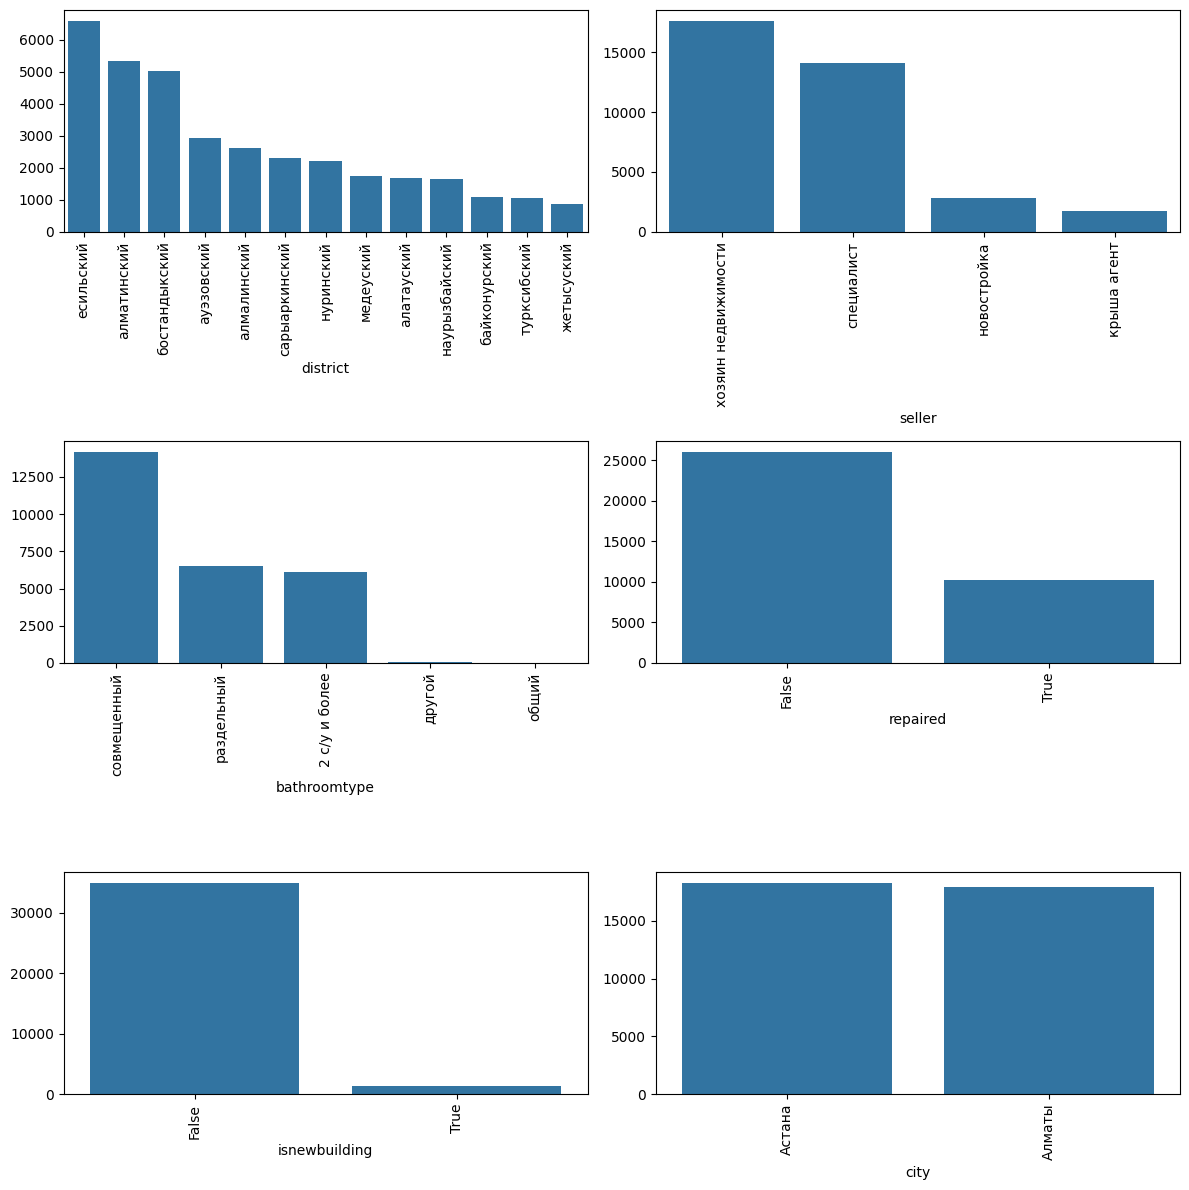

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()
'''
0 0 0, 0 1 1
1 0 2, 1 1 3
2 0 4, 2 1 5

'''

for i, col in enumerate(cat_cols):
    count_cols = df[col].value_counts()         
    
    ax = axs[i]
    sns.barplot(x=count_cols.index, y=count_cols.values, ax=ax)
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

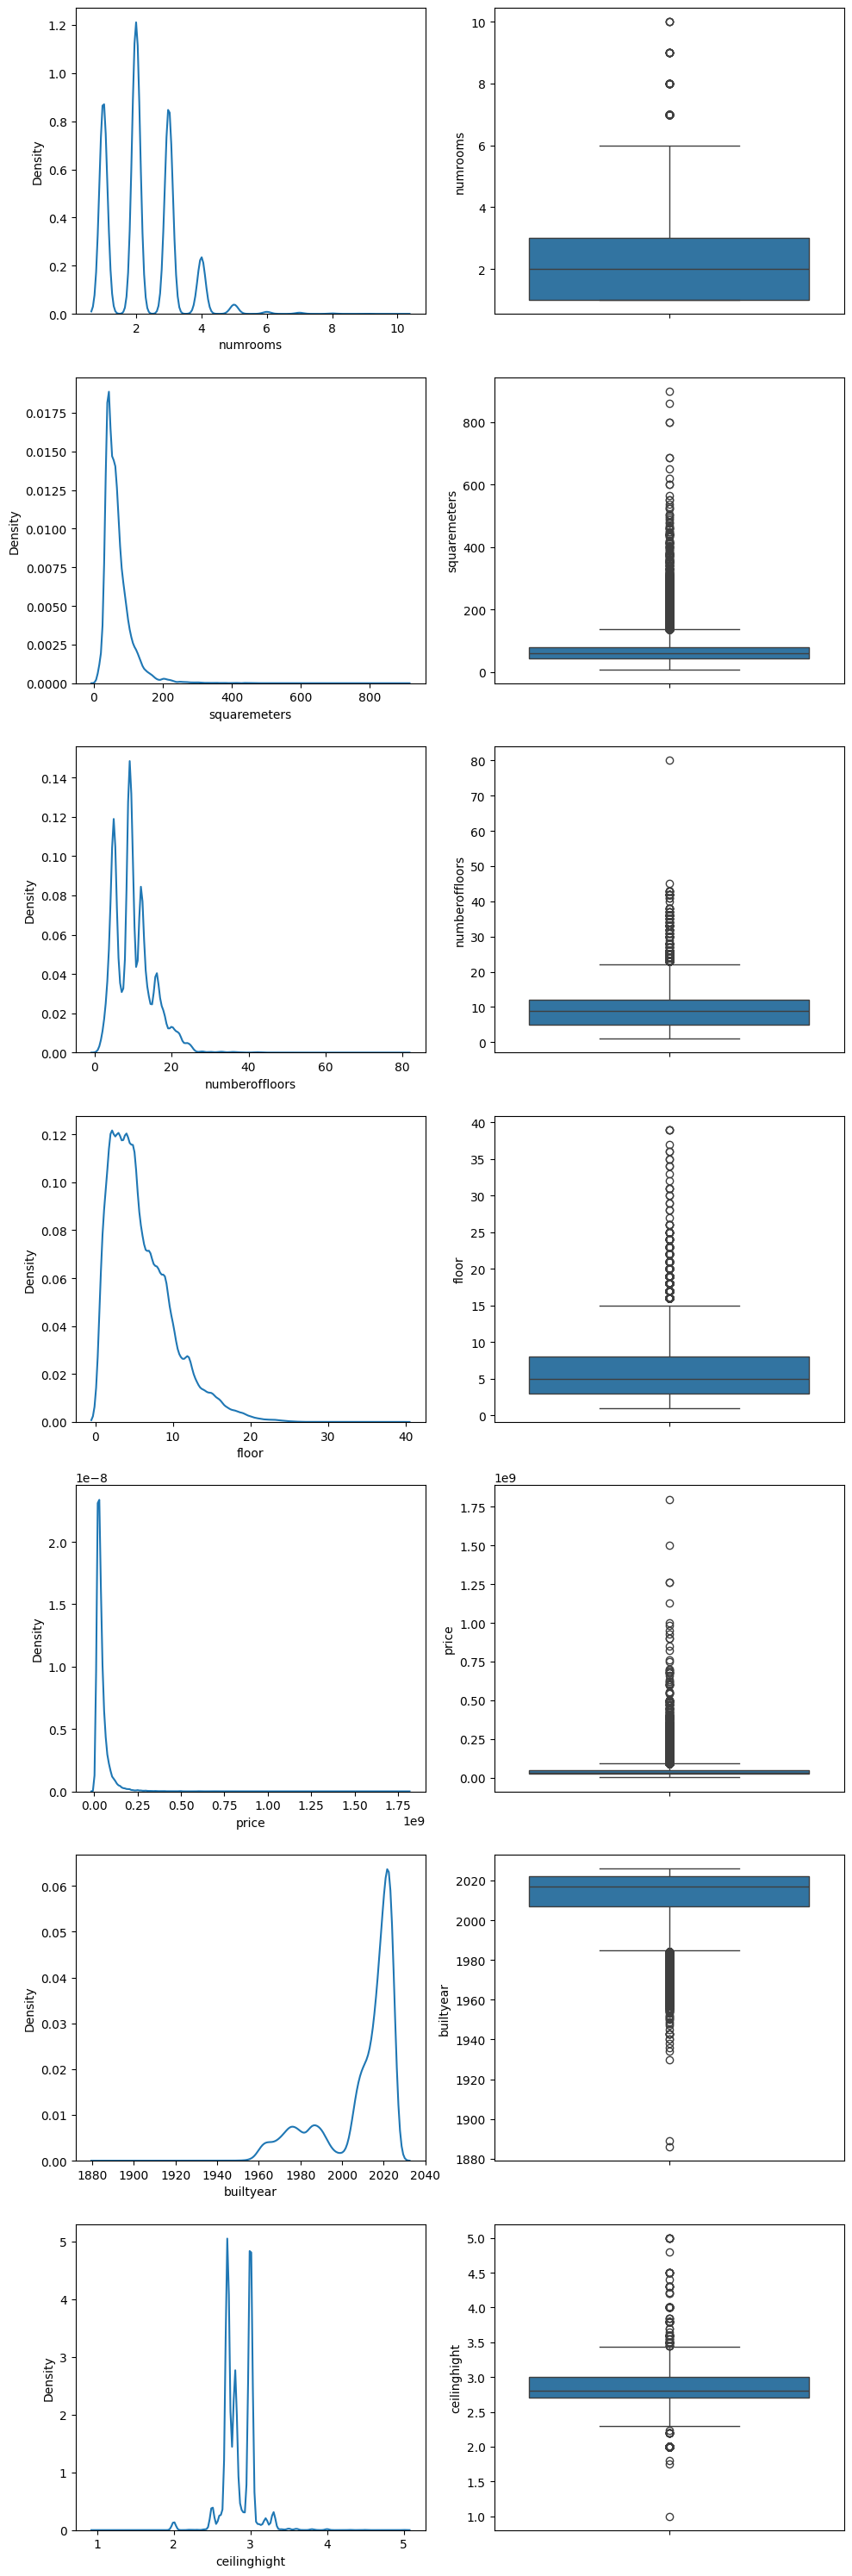

In [17]:
fig, axs = plt.subplots(len(num_cols), 2, figsize=(10, 30))

for i, col in enumerate(num_cols):
    sns.kdeplot(data=df[col], ax=axs[i, 0])
    sns.boxplot(data=df[col], ax=axs[i, 1])
plt.tight_layout()
plt.show()

In [18]:
df['price'].max()

1800000000

In [19]:
def capcap(col, df_skew=df):
    #finding the Q1(25 percentile) and Q3(75 percentile)
    q1 = df_skew[col].quantile(0.25)
    q2 = df_skew[col].quantile(0.75)
    
    #finding out the value of Inter Quartile Range
    IQR = q2 - q1
    
    #defining max and min limits
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR) 
    
    #capping
    df_skew_new = pd.DataFrame(np.where(df_skew[col] > max_limit, max_limit, 
         (np.where(df_skew[col] < min_limit, min_limit, df_skew[col]))), columns=[col])
    
    return df_skew_new



In [20]:
df_after_capping = df.copy()
df_after_capping['ceilinghight'] = capcap('ceilinghight')
df_after_capping['builtyear'] = capcap('builtyear')
df_after_capping['price'] = capcap('price')


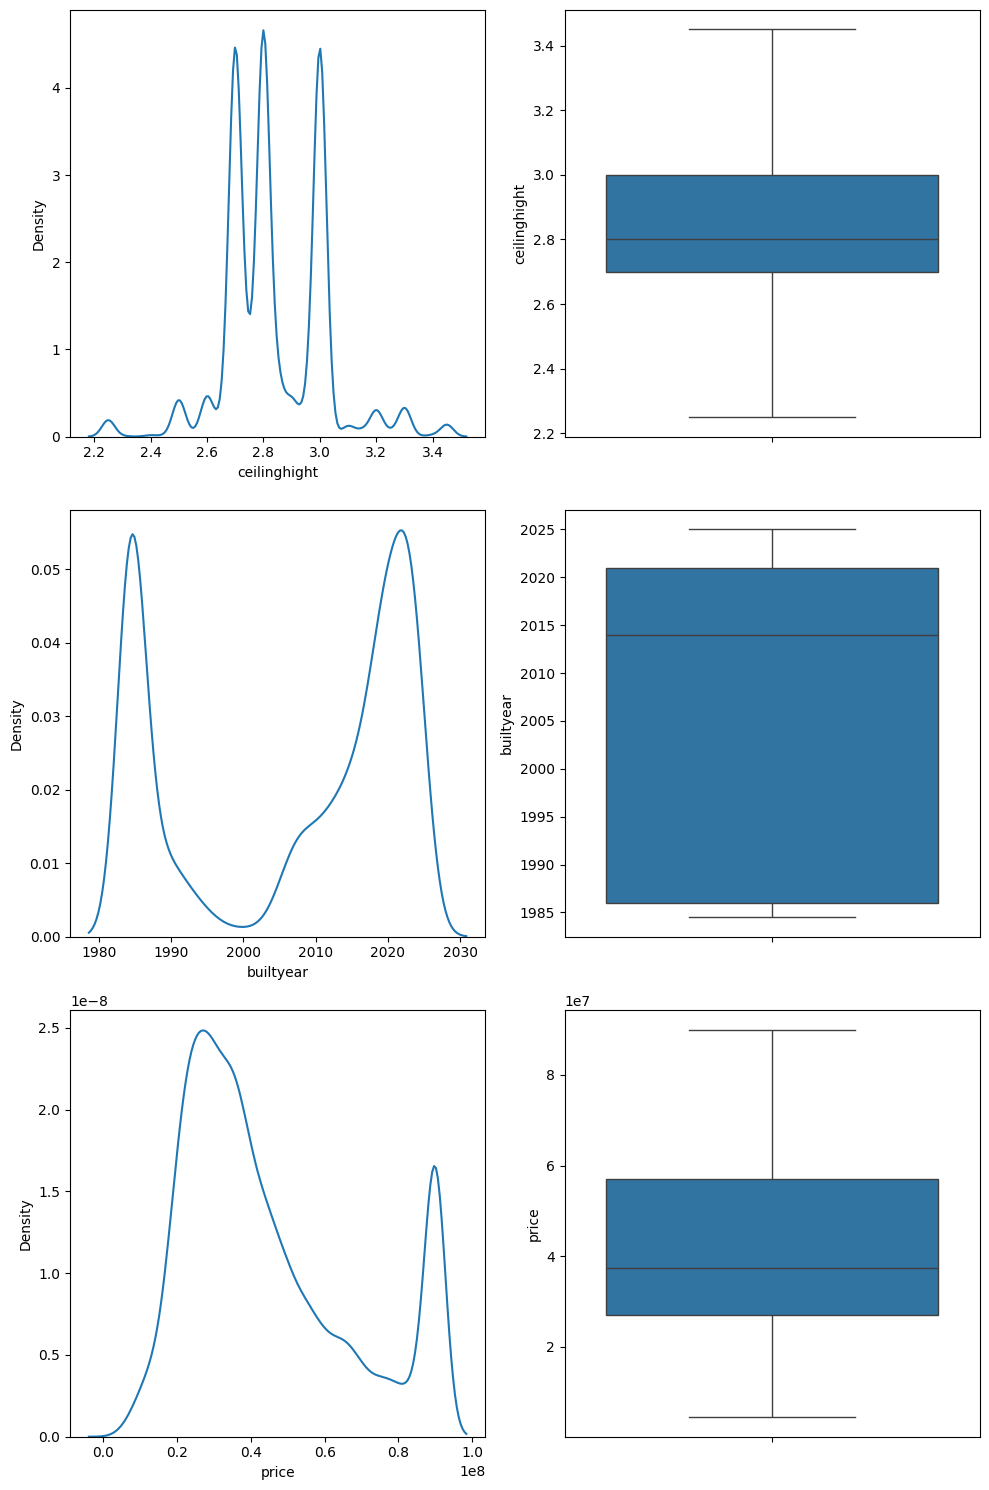

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))
sns.kdeplot(data=df_after_capping['ceilinghight'], ax=axs[0, 0])
sns.boxplot(data=df_after_capping['ceilinghight'], ax=axs[0, 1])
sns.kdeplot(data=df_after_capping['builtyear'], ax=axs[1, 0])
sns.boxplot(data=df_after_capping['builtyear'], ax=axs[1, 1])
sns.kdeplot(data=df_after_capping['price'], ax=axs[2, 0])
sns.boxplot(data=df_after_capping['price'], ax=axs[2, 1])
plt.tight_layout()
plt.show()

In [22]:
hasnum = df_after_capping.isnull().sum()
hasnum[hasnum > 0]


numberoffloors    2459
floor             2020
district          1268
ceilinghight      7755
bathroomtype      9434
city                79
dtype: int64

In [23]:
null_vals_to_replace = {
    "numberoffloors": -1,
    "floor": -1,
    "district": "Неизвестно",
    "ceilinghight": 2.7,
    "bathroomtype": "Нейзвестно",
    "city": "Не город",
}

In [24]:
df_after_capping = df_after_capping.fillna(null_vals_to_replace)

In [25]:
df_after_capping.isnull().sum()

numrooms          0
squaremeters      0
numberoffloors    0
floor             0
price             0
district          0
builtyear         0
ceilinghight      0
isnewbuilding     0
seller            0
bathroomtype      0
repaired          0
city              0
isrescomplex      0
dtype: int64

In [26]:
df = df_after_capping
df.dtypes


numrooms            int64
squaremeters      float64
numberoffloors    float64
floor             float64
price             float64
district           object
builtyear         float64
ceilinghight      float64
isnewbuilding        bool
seller             object
bathroomtype       object
repaired             bool
city               object
isrescomplex         bool
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cols = ['district', 'seller', 'bathroomtype', 'city']

for col in cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()



,numrooms,squaremeters,numberoffloors,floor,price,district,builtyear,ceilinghight,isnewbuilding,seller,bathroomtype,repaired,city,isrescomplex
0,4,160.85,-1.0,-1.0,90000000.0,6,2025.0,3.0,True,1,0,False,0,True
1,2,72.00,-1.0,-1.0,79200000.0,0,2024.0,3.0,True,1,0,False,0,True
2,1,38.30,-1.0,-1.0,25929100.0,8,2025.0,3.0,True,1,5,False,0,True
3,6,340.60,-1.0,-1.0,90000000.0,6,2013.0,3.0,True,1,0,False,0,True
4,3,87.00,16.0,5.0,90000000.0,6,2019.0,3.0,False,0,0,False,0,True


In [ ]:
xgb = xgb.XGBClassifier()

